# Simple Linear Regression For Data Science

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Introduction to Linear Regression 
Linear regression is a powerful modeling technique that can be used to understand the relationship between a quantitative variable and one or more other variables, sometimes with the goal of making predictions. For example, linear regression can help us answer questions like:

- What is the relationship between apartment size and rental price for NYC apartments?
- Is a mother’s height a good predictor of their child’s adult height?

The first step before fitting a linear regression model is exploratory data analysis and data visualization: is there a relationship that we can model?

In [2]:
students = pd.read_csv("test_data.csv")

In [4]:
# Write equation for a line
y = 9.85 * students["hours_studied"] + 43

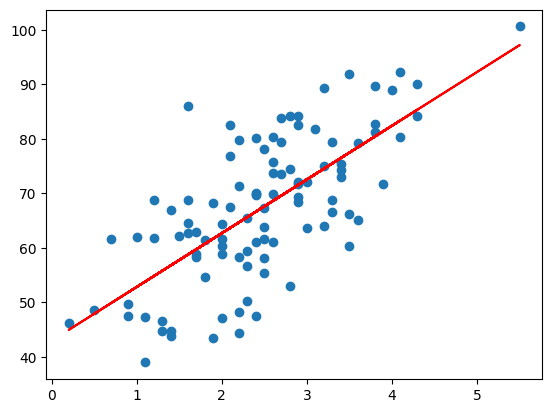

In [12]:
plt.scatter(data = students, x = "hours_studied", y = "score")
plt.plot(students["hours_studied"], y, color="r");

## Equation of a Line
Like the name implies, LINEar regression involves fitting a line to a set of data points. In order to fit a line, it’s helpful to understand the equation for a line, which is often written as ``y=mx+b``. In this equation:

- x and y represent variables, such as height and weight or hours of studying and quiz scores.


- b represents the y-intercept of the line. This is where the line intersects with the y-axis (a vertical line located at x = 0).


- m represents the slope. This controls how steep the line is. If we choose any two points on a line, the slope is the ratio between the vertical and horizontal distance between those points; this is often written as rise/run.

### Exercise 1
we’ve again plotted `score` (as the y-variable) against `hours_studied` (the x-variable), with a line going through the points. Let’s see if we can improve this line so that it better fits the data. To start, the line appears to be too steep.

In [13]:
predicted_score = 30 * students.hours_studied + 15

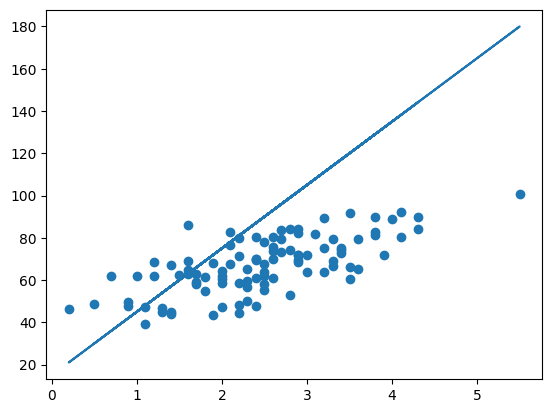

In [17]:
plt.scatter(data = students, x = "hours_studied", y = "score") 
plt.plot(students["hours_studied"], predicted_score);

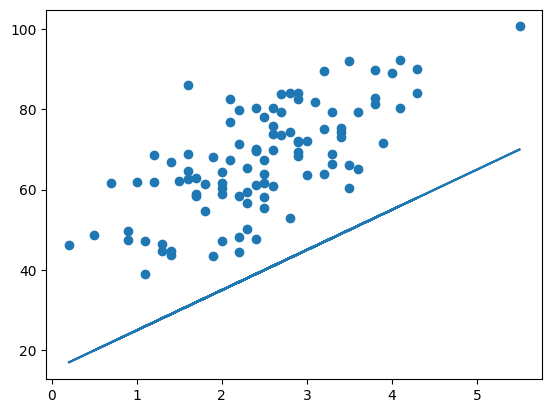

In [18]:
predicted_score = 10 * students.hours_studied + 15

plt.scatter(data = students, x = "hours_studied", y = "score") 
plt.plot(students["hours_studied"], predicted_score);

**The line now appears to be parallel to the points but still sits below them! Leaving the slope of the line equal to 10, edit the equation of the line so that the y-intercept is 45,**

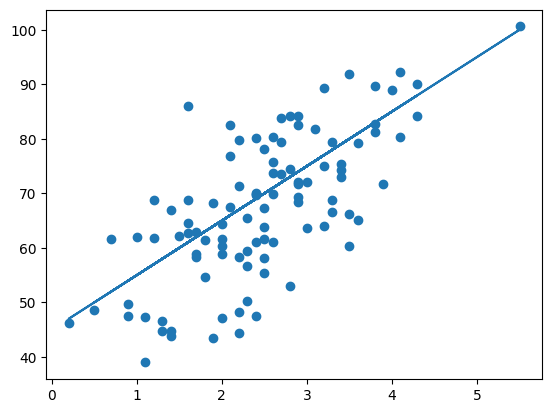

In [19]:
predicted_score = 10 * students.hours_studied + 45

plt.scatter(data = students, x = "hours_studied", y = "score") 
plt.plot(students["hours_studied"], predicted_score);

## Finding the "Best" Line
- In the last exercise, we tried to eye-ball what the best-fit line might look like. In order to actually choose a line, we need to come up with some criteria for what “best” actually means.


- Depending on our ultimate goals and data, we might choose different criteria; however, a common choice for linear regression is ``ordinary least squares (OLS)``. In simple OLS regression, we assume that the relationship between two variables x and y can be modeled as:


     - y=mx+b+error


- We define “best” as the line that minimizes the total `squared error` for all data points. This total squared error is called the `loss function` in machine learning. 

## Fitting a Linear Regression Model in Python
There are a number of Python libraries that can be used to fit a linear regression, but in this course, we will use the ``OLS.from_formula()`` function from ``statsmodels.api`` because it uses simple syntax and provides comprehensive model summaries.

### Exercise
- Using the `students` dataset, create a linear regression model that predicts student score using `hours_studied` as a predictor and save the result as a variable named `model`.

- Fit the model using the ``.fit()`` method on model (created in the previous step), and save the fitted model as ``results``.

- Print out the model coefficients using either ``.params``.

In [20]:
import statsmodels.api as sm

In [25]:
model = sm.OLS.from_formula("score ~ hours_studied", data = students)

In [26]:
results = model.fit()

In [28]:
results.params

Intercept        43.016014
hours_studied     9.848111
dtype: float64

In [42]:
# This tells us that the best-fit intercept is 43.01, and the best-fit slope is 9.84.
# A student who studied for 0 hours is expected to score a 43.01 on the test.
# For every additional 1 hours of studying, students are expected to score 9.8 points higher on tht test.

## Using a Regression Model for Prediction
### Exercise
Using your model, what is the predicted score for a student who spent 3 hours studying?

In [43]:
# Easy Solution
newdata = {"hours_studied" : 3}
results.predict(newdata)[0]

# A student who studied for 3 hours is expected to score a 72.56 on the test.

72.56034698735525

In [41]:
# Hard Coding Solution
pred_3hr = results.params[1] * 3 + results.params[0]
pred_3hr

72.56034698735525

## Assumptions of Linear Regression
1. **Linearity** : The relationship between the outcome variable and predictor is linear (can be described by a line). We can check this before fitting the regression by simply looking at a plot of the two variables.


2. **Normality :** The normality assumption states that the residuals should be normally distributed. To check this assumption, we can inspect a histogram of the residuals and make sure that the distribution looks approximately normal


3. **Homoscedasticity :** Homoscedasticity is a fancy way of saying that the residuals have equal variation across all values of the predictor variable. A common way to check this is by plotting the residuals against the fitted values.
    - If the homoscedasticity assumption is met, then this plot will look like a random splatter of points, centered around y=0
    - If there are any patterns or asymmetry, that would indicate the assumption is NOT met and linear regression may not be appropriate.

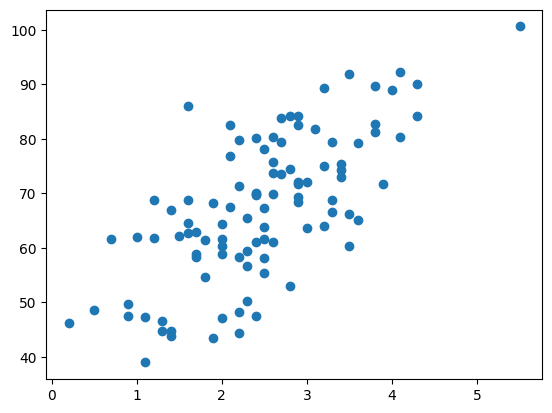

In [47]:
# Assumption 1
plt.scatter(data = students, x = "hours_studied", y = "score");

**The relationship between the outcome variable(score) and predictor(hours_studied) is linear.**

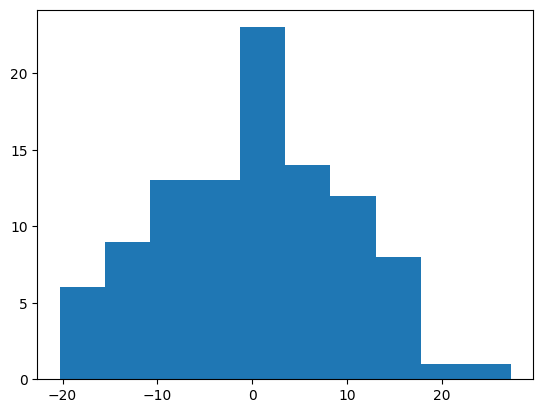

In [50]:
# Assumption 2
fitted_values = results.predict(students["hours_studied"])
residuals = students["score"] - fitted_values

plt.hist(residuals);

**These residuals appear normally distributed, leading us to conclude that the normality assumption is satisfied.**

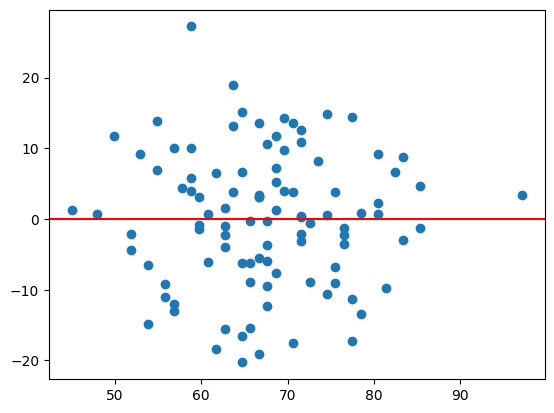

In [57]:
# Assumption 3
plt.scatter(fitted_values, residuals)
plt.axhline(0, color = "r");

**The homoscedasticity assumption is met because plot look like a random splatter of points, centered around y=0**

## Categorical Predictors
- In the previous exercises, we used a quantitative predictor in our linear regression, but it’s important to note that we can also use categorical predictors. The simplest case of a categorical predictor is a binary variable (only two categories).


### Exercise 1
- Using the dataset students, plot a scatter plot of score (y-axis) against breakfast (x-axis) to see scores for students who did and did not eat breakfast.


-  Calculate the mean test score for students who ate breakfast and the mean score for students who did not eat breakfast. Use these numbers to plot the best-fit line on top of the scatter plot.

In [61]:
students.groupby("breakfast")["score"].mean()

breakfast
0    61.664151
1    73.721277
Name: score, dtype: float64

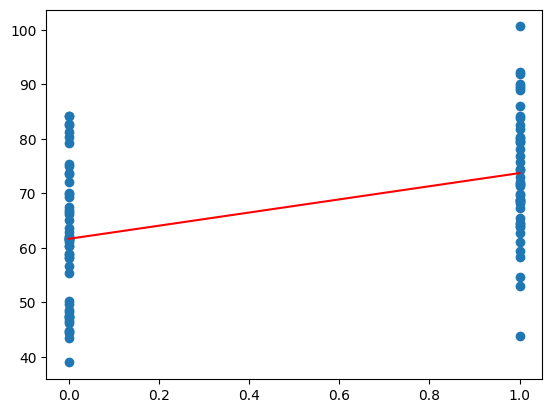

In [63]:
plt.scatter(data = students, x = "breakfast", y = "score")
plt.plot(students.groupby("breakfast")["score"].mean(), color = "r")

### Exercise 2
Create and fit a regression model of `score` predicted by `breakfast` using ``sm.OLS.from_formula()`` and print out the coefficients.

In [65]:
model = sm.OLS.from_formula("score ~ breakfast", data = students)

In [68]:
results = model.fit()

In [69]:
results.params

Intercept    61.664151
breakfast    12.057126
dtype: float64

### Exercise 3
- Calculate the mean test score for students who ate breakfast (save as `mean_score_breakfast`) and the mean score for students who did not eat breakfast (save as `mean_score_no_breakfast`). 


- Calculate and print the difference in mean scores. Can you find how this number relates to the regression output?

In [74]:
mean_score_breakfast = students[students["breakfast"] == 1]["score"].mean()
mean_score_breakfast

73.7212765957447

In [75]:
mean_score_no_breakfast = students[students["breakfast"] == 0]["score"].mean()
mean_score_no_breakfast

61.66415094339621

In [76]:
mean_score_breakfast - mean_score_no_breakfast
# yes absolutely this number relates to regression output.
# Because this number equal to slope.

12.057125652348489

## Extra Exercise
A new dataset named website has been loaded for you in the workspace containing simulated data for a sample of visitors to a website, including the amount of time in seconds they spent on the website (time_seconds), their age (age), and information about whether they accessed the website using Chrome or Safari (browser).

1. Create a plot of `time_seconds` (vertical axis) versus `age` (horizontal axis). Is there a linear relationship between these variables?
2. Fit a linear model to predict `time_seconds` using the `age` variable
3. Use the coefficients from the linear model to plot the regression line on top of your original plot.
4. Calculate the fitted values and residuals
5. Check the normality assumption by plotting a histogram of the residuals. Are they approximately normally distributed?
6. Check the homoscedasticity assumption by plotting a the residuals against the fitted values. Is this assumption satisfied?
7. Use your model to predict the amount of time that a 40 year old person will spend on the website.
8. Fit another model that predicts time_seconds based on browser.
9. Print out the coefficients. What is the difference in average time spent on each browser?

In [78]:
website = pd.read_csv("website.csv")
website.head()

,time_seconds,age,browser
0,486.0,47.1,Safari
1,645.7,64.6,Chrome
2,345.0,45.4,Safari
3,413.4,34.4,Chrome
4,426.4,31.3,Safari


### 1. Create a plot of time_seconds (vertical axis) versus age (horizontal axis). Is there a linear relationship between these variables?

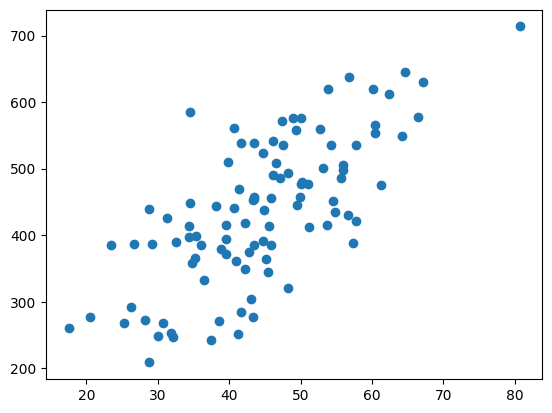

In [81]:
plt.scatter(data = website, x = "age", y = "time_seconds");
# Yes there is a linear relationship between these variables.

### 2. Fit a linear model to predict time_seconds using the age variable

In [82]:
model = sm.OLS.from_formula("time_seconds ~ age", data = website)

In [83]:
results = model.fit()

In [84]:
results.params

Intercept    128.967945
age            6.913758
dtype: float64

### 3. Use the coefficients from the linear model to plot the regression line on top of your original plot.

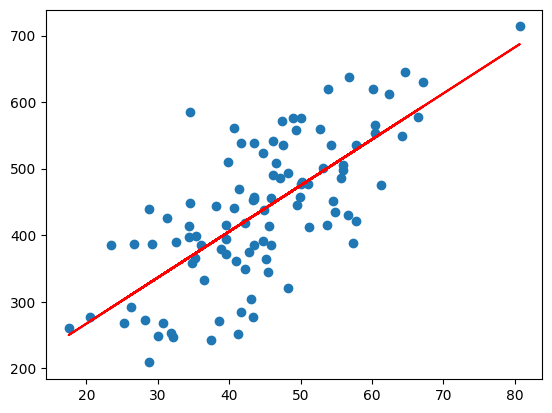

In [88]:
plt.scatter(data = website, x = "age", y = "time_seconds")
plt.plot(website["age"], results.params[0] + results.params[1] * website["age"], color = "r");

### 4. Calculate the fitted values and residuals

In [90]:
fitted_values = results.predict(website["age"])
residuals = website["time_seconds"] - fitted_values

### 5. Check the normality assumption by plotting a histogram of the residuals. Are they approximately normally distributed?

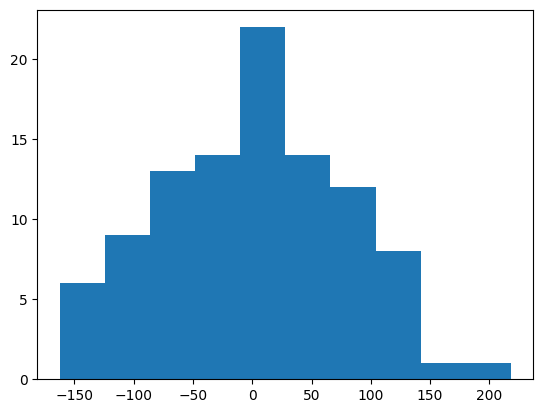

In [92]:
plt.hist(residuals);

In [93]:
# Yes they are approximately normally distributed.

### 6. Check the homoscedasticity assumption by plotting a the residuals against the fitted values. Is this assumption satisfied?

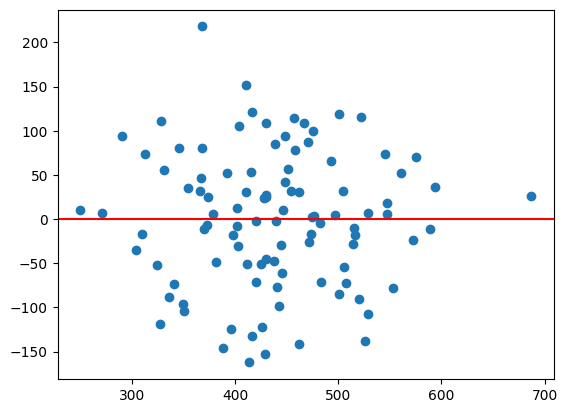

In [94]:
plt.scatter(fitted_values, residuals)
plt.axhline(0, color = "r");

In [95]:
# Yes this assumption satisfied.

### 7. Use your model to predict the amount of time that a 40 year old person will spend on the website.

In [97]:
new_data = {"age" : 40}

In [101]:
results.predict(new_data)[0]

405.51824893244964

### 8. Fit another model that predicts time_seconds based on browser.

In [102]:
model = sm.OLS.from_formula("time_seconds ~ browser", data = website)
results = model.fit()

### 9. Print out the coefficients. What is the difference in average time spent on each browser?

In [103]:
results.params

Intercept            489.704255
browser[T.Safari]    -99.057086
dtype: float64

In [108]:
Safari_mean_time = website[website["browser"] == "Safari"]["time_seconds"].mean()
Safari_mean_time

390.64716981132074

In [110]:
Chrome_mean_time = website[website["browser"] == "Chrome"]["time_seconds"].mean()
Chrome_mean_time

489.70425531914907